In [1]:
import torch
from torch import nn
import torchvision.datasets as datasets 
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from models import *

import matplotlib.pyplot as plt

## Loading the dataset and viewing samples

In [2]:
training_data = datasets.MNIST(root='datasets', download=True, train=True, transform=ToTensor())
testing_data = datasets.MNIST(root='datasets', download=True, train=False, transform=ToTensor())

training_loader = DataLoader(training_data, batch_size=64, shuffle=True)
testing_loader = DataLoader(testing_data, batch_size=64, shuffle=True)

Displaying a few sample images

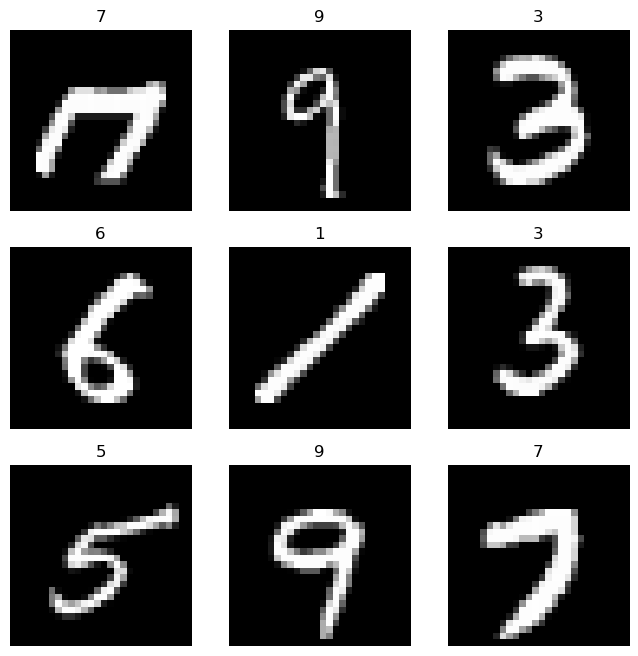

In [3]:
figure = plt.figure(figsize = (8,8))
rows, cols = 3, 3

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")

## Making predictions before training

Getting a random sample

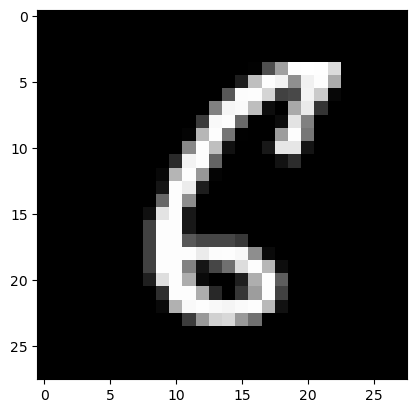

In [8]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
plt.imshow(img.squeeze(), cmap="gray")

In [9]:
model_state_dict = torch.load('models/ConvModel/model.pth')

model = ConvModel()
model.load_state_dict(model_state_dict)
prediction = model(img)

print(prediction)

tensor([[3.8920e-01, 5.2808e-04, 2.2180e-03, 5.4088e-04, 1.1715e-03, 2.2968e-02,
         2.0696e-01, 1.2278e-04, 3.7478e-01, 1.5087e-03]],
       grad_fn=<SoftmaxBackward0>)
